In [38]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [39]:
import sidrapy

data = sidrapy.get_table(table_code="6586", territorial_level="3", ibge_territorial_code="all", period="last 96")

In [3]:
data

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Unidade da Federação (Código),Unidade da Federação,Mês (Código),Mês,Variável (Código),Variável
1,3,Unidade da Federação,38,Reais,1138.83,11,Rondônia,201701,janeiro 2017,9327,"Custo médio m² - moeda corrente, sem desoneraç..."
2,3,Unidade da Federação,38,Reais,590.45,11,Rondônia,201701,janeiro 2017,9328,Custo médio m² - componente material - moeda c...
3,3,Unidade da Federação,38,Reais,548.38,11,Rondônia,201701,janeiro 2017,9329,Custo médio m² - componente mão-de-obra - moed...
4,3,Unidade da Federação,30,Número-índice,634.95,11,Rondônia,201701,janeiro 2017,9330,"Custo médio m² - número-índice, sem desoneraçã..."
...,...,...,...,...,...,...,...,...,...,...,...
15548,3,Unidade da Federação,30,Número-índice,682.87,53,Distrito Federal,202204,abril 2022,9331,Custo médio m² - componente material - número-...
15549,3,Unidade da Federação,30,Número-índice,967.23,53,Distrito Federal,202204,abril 2022,9332,Custo médio m² - componente mão-de-obra - núme...
15550,3,Unidade da Federação,2,%,0.76,53,Distrito Federal,202204,abril 2022,9333,"Custo médio m² - variação percentual no mês, s..."
15551,3,Unidade da Federação,2,%,2.55,53,Distrito Federal,202204,abril 2022,9334,"Custo médio m² - variação percentual no ano, s..."


In [24]:
data.isnull().sum() # Valores nulos

0
Valor                   0
Unidade da Federação    0
Mês                     0
Variável                0
dtype: int64

In [23]:
data.duplicated().sum() # Linhas duplicadas

0

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15552 entries, 1 to 15552
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Valor                 15552 non-null  object
 1   Unidade da Federação  15552 non-null  object
 2   Mês                   15552 non-null  object
 3   Variável              15552 non-null  object
dtypes: object(4)
memory usage: 607.5+ KB


In [4]:
data.drop(['NC','NN','MC','MN','D1C','D2C','D3C'], axis=1, inplace = True)

In [5]:
data.columns = data.loc[0,:]

In [6]:
data.drop([0], axis = 0, inplace = True)

In [7]:
data

,Valor,Unidade da Federação,Mês,Variável
1,1138.83,Rondônia,janeiro 2017,"Custo médio m² - moeda corrente, sem desoneraç..."
2,590.45,Rondônia,janeiro 2017,Custo médio m² - componente material - moeda c...
3,548.38,Rondônia,janeiro 2017,Custo médio m² - componente mão-de-obra - moed...
4,634.95,Rondônia,janeiro 2017,"Custo médio m² - número-índice, sem desoneraçã..."
5,449.69,Rondônia,janeiro 2017,Custo médio m² - componente material - número-...
...,...,...,...,...
15548,682.87,Distrito Federal,abril 2022,Custo médio m² - componente material - número-...
15549,967.23,Distrito Federal,abril 2022,Custo médio m² - componente mão-de-obra - núme...
15550,0.76,Distrito Federal,abril 2022,"Custo médio m² - variação percentual no mês, s..."
15551,2.55,Distrito Federal,abril 2022,"Custo médio m² - variação percentual no ano, s..."


In [8]:
data.Variável.unique()

array(['Custo médio m² - moeda corrente, sem desoneração da folha de pagamento',
       'Custo médio m² - componente material - moeda corrente, sem desoneração da folha de pagamento',
       'Custo médio m² - componente mão-de-obra - moeda corrente, sem desoneração da folha de pagamento',
       'Custo médio m² - número-índice, sem desoneração da folha de pagamento',
       'Custo médio m² - componente material - número-índice, sem desoneração da folha de pagamento',
       'Custo médio m² - componente mão-de-obra - número-índice, sem desoneração da folha de pagamento',
       'Custo médio m² - variação percentual no mês, sem desoneração da folha de pagamento',
       'Custo médio m² - variação percentual no ano, sem desoneração da folha de pagamento',
       'Custo médio m² - variação percentual em doze meses, sem desoneração da folha de pagamento'],
      dtype=object)

In [9]:
dfcusto = data[data.Variável == 'Custo médio m² - moeda corrente, sem desoneração da folha de pagamento']
dfmat = data[data.Variável ==  'Custo médio m² - componente material - moeda corrente, sem desoneração da folha de pagamento']
dfmao = data[data.Variável == 'Custo médio m² - componente mão-de-obra - moeda corrente, sem desoneração da folha de pagamento']
df4 = data[data.Variável == 'Custo médio m² - número-índice, sem desoneração da folha de pagamento']
df5 = data[data.Variável == 'Custo médio m² - componente material - número-índice, sem desoneração da folha de pagamento']
df6 = data[data.Variável ==  'Custo médio m² - variação percentual no mês, sem desoneração da folha de pagamento']
df7 = data[data.Variável ==  'Custo médio m² - variação percentual no ano, sem desoneração da folha de pagamento']
df8 = data[data.Variável == 'Custo médio m² - variação percentual em doze meses, sem desoneração da folha de pagamento']

In [12]:
dfcusto.drop(['Variável'], axis=1, inplace = True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
dfcusto

,Valor,Unidade da Federação,Mês
1,1138.83,Rondônia,janeiro 2017
10,1141.95,Rondônia,fevereiro 2017
19,1145.55,Rondônia,março 2017
28,1141.59,Rondônia,abril 2017
37,1137.98,Rondônia,maio 2017
...,...,...,...
15508,1675.37,Distrito Federal,dezembro 2021
15517,1680.66,Distrito Federal,janeiro 2022
15526,1695.98,Distrito Federal,fevereiro 2022
15535,1705.11,Distrito Federal,março 2022


In [15]:
dfmat.drop(['Variável'], axis=1, inplace = True)
dfmat

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Valor,Unidade da Federação,Mês
2,590.45,Rondônia,janeiro 2017
11,596.69,Rondônia,fevereiro 2017
20,597.17,Rondônia,março 2017
29,593.21,Rondônia,abril 2017
38,592.72,Rondônia,maio 2017
...,...,...,...
15509,985.67,Distrito Federal,dezembro 2021
15518,992.15,Distrito Federal,janeiro 2022
15527,1007.47,Distrito Federal,fevereiro 2022
15536,1016.32,Distrito Federal,março 2022


In [16]:
dfmao.drop(['Variável'], axis=1, inplace = True)
dfmao

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Valor,Unidade da Federação,Mês
3,548.38,Rondônia,janeiro 2017
12,545.26,Rondônia,fevereiro 2017
21,548.38,Rondônia,março 2017
30,548.38,Rondônia,abril 2017
39,545.26,Rondônia,maio 2017
...,...,...,...
15510,689.70,Distrito Federal,dezembro 2021
15519,688.51,Distrito Federal,janeiro 2022
15528,688.51,Distrito Federal,fevereiro 2022
15537,688.79,Distrito Federal,março 2022


In [30]:
dfcusto.Valor = dfcusto.Valor.astype(float)
dfmat.Valor = dfmat.Valor.astype(float)
dfmao.Valor = dfmao.Valor.astype(float)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
dfcusto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 1 to 15544
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Valor                 1728 non-null   float64
 1   Unidade da Federação  1728 non-null   object 
 2   Mês                   1728 non-null   object 
dtypes: float64(1), object(2)
memory usage: 54.0+ KB


In [33]:
dfcusto.to_csv('CustoM.csv', index = False)
dfmat.to_csv('CustoMat.csv', index = False)
dfmao.to_csv('CustoMao.csv', index = False)

## Exportado Arquivos - PowerBI
## ------------------------------------------------------

# Aplicando ARIMA para previsão

In [40]:
from matplotlib.pylab import rcParams
import scipy.stats as stats
from datetime import datetime, date
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [39]:
dfcusto['Unidade da Federação'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [50]:
dfRS = dfcusto[dfcusto['Unidade da Federação'] == 'Rio Grande do Sul'].iloc[:,[2,0]]

In [52]:
dfRS.to_excel('ValoresRS.xlsx')

In [41]:
dfRSa = pd.read_csv('ValoresRSb.csv', sep=';')

In [42]:
dfRSa.Data = pd.to_datetime(dfRSa.Data, format='%d/%m/%Y')

In [43]:
dfRSa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    64 non-null     datetime64[ns]
 1   Valor   64 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [44]:
dfprev = dfRSa 

In [65]:
dfprev[dfprev.Valor > 1500]

,Valor
Data,
2021-07-01,1531.11
2021-08-01,1547.00
2021-09-01,1575.89
2021-10-01,1577.85
2021-11-01,1595.63
2021-12-01,1607.67
2022-01-01,1615.33
2022-02-01,1617.12
2022-03-01,1619.39


In [46]:
dfprev = dfprev.set_index('Data')

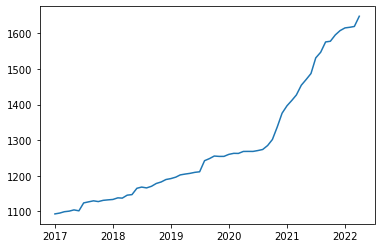

In [47]:
plt.plot(dfprev)

In [ ]:
decomposed = seasonal.seasonal_decompose(x=dfprev, freq=12, extrapolate_trend='freq')

In [48]:
prev_series = dfprev['Valor']

In [49]:
prev_series

Data
2017-01-01    1092.97
2017-02-01    1095.42
2017-03-01    1099.12
2017-04-01    1100.78
2017-05-01    1104.25
               ...   
2021-12-01    1607.67
2022-01-01    1615.33
2022-02-01    1617.12
2022-03-01    1619.39
2022-04-01    1648.07
Name: Valor, Length: 64, dtype: float64

In [54]:
decomp = seasonal_decompose(prev_series, freq=12, extrapolate_trend='freq')

C:\Users\DELL\AppData\Local\Temp/ipykernel_14880/2240023390.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp = seasonal_decompose(prev_series, freq=12, extrapolate_trend='freq')


In [55]:
tendencia = decomp.trend

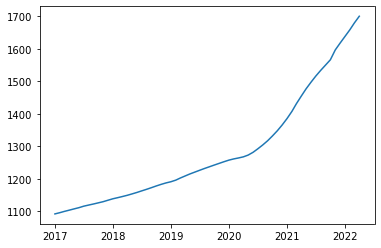

In [57]:
plt.plot(tendencia)

In [56]:
tendencia

Data
2017-01-01    1091.753362
2017-02-01    1095.597306
2017-03-01    1099.441250
2017-04-01    1103.285193
2017-05-01    1107.129137
                 ...     
2021-12-01    1617.476164
2022-01-01    1638.191926
2022-02-01    1658.907688
2022-03-01    1679.623450
2022-04-01    1700.339212
Name: trend, Length: 64, dtype: float64

In [53]:
modelo = auto_arima(prev_series)
modelo.order

(0, 2, 1)

In [60]:
previsao = pd.DataFrame(modelo.predict(n_periods=12))
previsao.columns = ['Previsão de valores 12 meses']
previsao

,Previsão de valores 12 meses
0,1662.078327
1,1676.086655
2,1690.094982
3,1704.103310
4,1718.111637
5,1732.119964
6,1746.128292
7,1760.136619
8,1774.144947
9,1788.153274


In [62]:
previsao.to_excel('Previsão 1 ano.xlsx')